# Paper Charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sectors = pd.read_csv('data/sectors.csv')

In [3]:
avg_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='TOTAL EMISSIONS',
    aggfunc=np.mean
).reset_index().drop(index=0)

In [4]:
for col in avg_BySector.columns[1:]:
    avg_BySector[col] = (avg_BySector[col] / 100000).round(2)

In [5]:
scope1_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 1',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope1_BySector.columns[1:]:
    scope1_BySector[col] = (scope1_BySector[col] / 100000).round(2)

scope2_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 2 (location-based)',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope2_BySector.columns[1:]:
    scope2_BySector[col] = (scope2_BySector[col] / 100000).round(2)

scope3_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 3',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope3_BySector.columns[1:]:
    scope3_BySector[col] = (scope3_BySector[col] / 100000).round(2)

Text(0.5, 0.98, 'Average Total Emissions by Sector Over Time (2018 - 2022)')

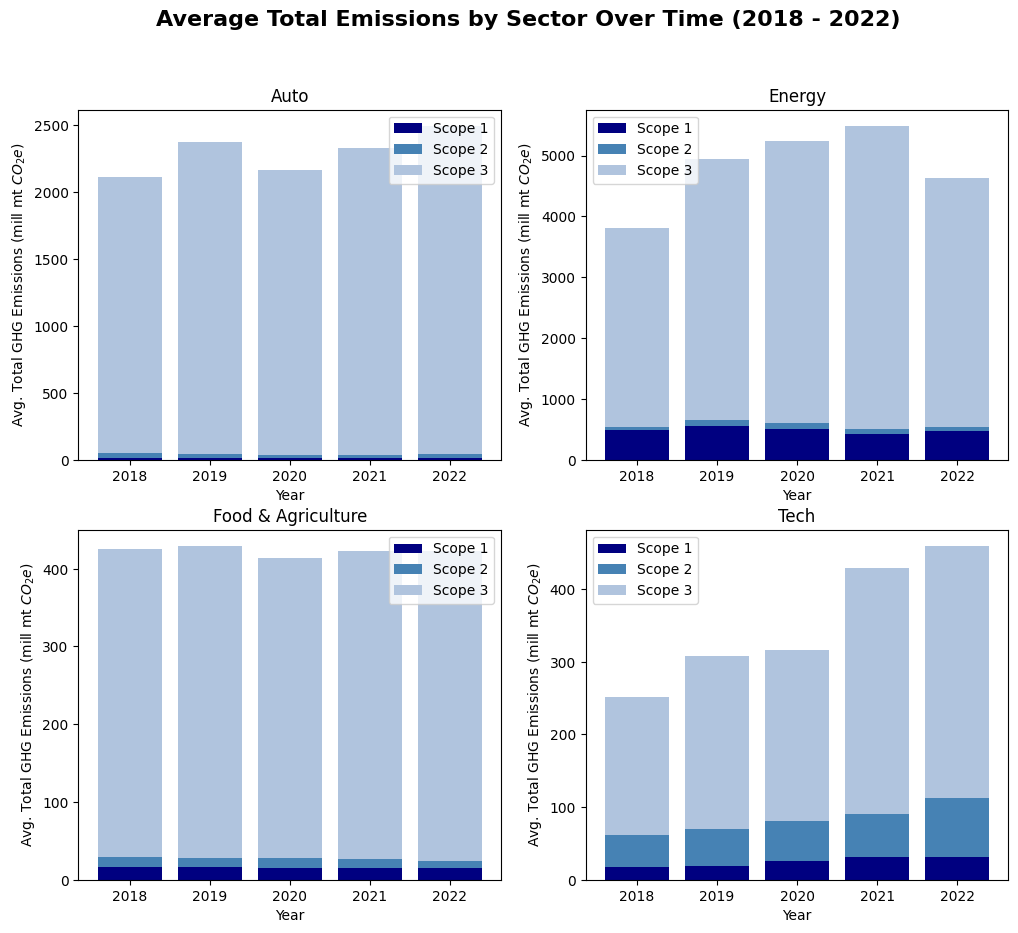

In [7]:
n=1
plt.figure(figsize=[12,10])
for col in avg_BySector.columns[1:]:
    plt.subplot(2,2,n)
    plt.bar(scope1_BySector['YEAR'], height=scope1_BySector[col], color='navy', label='Scope 1')
    plt.bar(scope2_BySector['YEAR'], height=scope2_BySector[col], bottom=scope1_BySector[col], color='steelblue', label='Scope 2')
    plt.bar(scope3_BySector['YEAR'], height=scope3_BySector[col], bottom=scope1_BySector[col]+scope2_BySector[col], color='lightsteelblue', label='Scope 3')


    plt.xlabel('Year')
    plt.ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    plt.title(col)
    plt.ylim(0, )
    plt.legend()
    n+=1
plt.suptitle('Average Total Emissions by Sector Over Time (2018 - 2022)', fontsize=16, fontweight='bold')


In [14]:
auto = sectors[(sectors['SECTOR']=='Auto') & (sectors['YEAR']!=2017) & (sectors['COMPANY NAME']!='Hyundai')& (sectors['COMPANY NAME']!='Toyota')]

In [9]:
def ci_OverTime(sector):

    companies = sectors.loc[sectors['SECTOR']==sector, 'COMPANY NAME'].unique()
    years = ['2018','2019', '2020', '2021', '2022']

    for co in companies:
        ci = sectors[sectors['COMPANY NAME'] == co]["Adjusted CI"]
        plt.plot(years, ci, label = co, marker='o', markersize=5)
    plt.legend(loc = 'upper right', fontsize = 'xx-small')
    plt.xlabel('Year')
    plt.ylabel('Carbon Intensity (mt $CO_{2}e$ / mill USD)')
    plt.title(sector +  ' Carbon Intensity Over Time (2018-2022)');

In [10]:
auto['YEAR'].unique()
auto[auto['COMPANY NAME'] == 'Tesla']["Adjusted CI"]

165      NaN
166      NaN
167      NaN
168    10.92
169     7.49
Name: Adjusted CI, dtype: float64

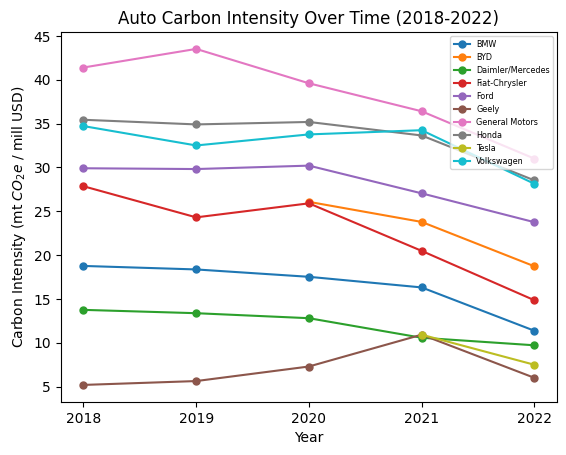

In [16]:
companies = auto.loc[:,'COMPANY NAME'].unique()
years = ['2018','2019', '2020', '2021', '2022']

for co in companies:
    ci = auto[auto['COMPANY NAME'] == co]["Adjusted CI"]
    plt.plot(years, ci, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (mt $CO_{2}e$ / mill USD)')
plt.title('Auto' +  ' Carbon Intensity Over Time (2018-2022)');

In [17]:
sectors

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR,CARBON INTENSITY\r\n(Scope 1 & 2 g CO2e / $ Sales),REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.390,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.150,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.260,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.720,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.330,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,NaN,57786.0,84.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,TSMC,2018,2125725.0,7001655.0,4315604.0,13442984.0,1031000.0,TWD,8.853,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,30930.0,295.10
213,TSMC,2019,2071743.0,7350195.0,5307729.0,14729667.0,1069950.0,TWD,8.806,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,32098.5,293.53
214,TSMC,2020,2010692.0,8282509.0,5571946.0,15865147.0,1339000.0,TWD,7.687,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,40170.0,256.24
215,TSMC,2021,2151937.0,9196964.0,6127157.0,17476058.0,1587420.0,TWD,7.149,Taiwan,True,False,NaN,Net-zero by 2050,Tech,NaN,47622.6,238.31


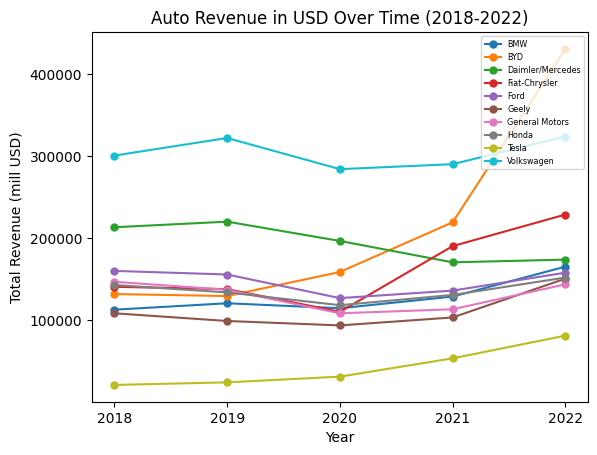

In [22]:
companies = auto.loc[:,'COMPANY NAME'].unique()
years = ['2018','2019', '2020', '2021', '2022']

for co in companies:
    rev = auto[auto['COMPANY NAME'] == co]["REVENUE IN USD"]
    plt.plot(years, rev, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Total Revenue (mill USD)')
plt.title('Auto' +  ' Revenue in USD Over Time (2018-2022)');

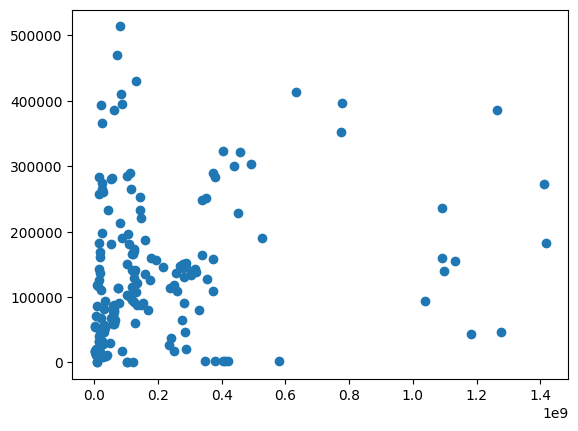

In [26]:
import seaborn as sns
plt.scatter(sectors['TOTAL EMISSIONS'], sectors['REVENUE IN USD'])